讀取excel檔案產出統計圖

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.color_palette("husl")
# %matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

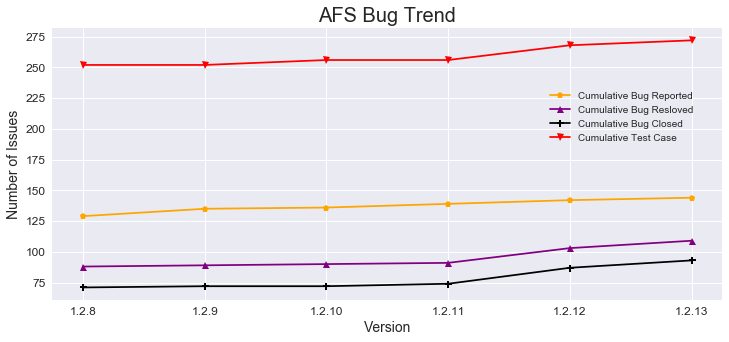

In [91]:
# Plot 'AFS Bug Trend'
data = pd.read_excel('bug_trend.xlsx', sheet_name='sheet1')
data = data.iloc[len(data)-6:len(data)]

# plt.bar(data.index, data['Bug Reported'], 'o-', color='green', label='bug_rp')
# plt.plot(data.index, bug_rs, 's-', color='blue', label='bug_rs')
# plt.plot(data.index, bug_closed, 'x-', color='yellow', label='bug_closed')
plt.plot(data.index, data['Cumulative Bug Reported'], 'p-', color='orange', label='C_bug_rp')
plt.plot(data.index, data['Cumulative Bug Resloved'], '^-', color='purple', label='C_bug_rs')
plt.plot(data.index, data['Cumulative Bug Closed'], 'P-', color='black', label='C_bug_closed')
plt.plot(data.index, data['Cumulative Test Case'], 'v-', color='red', label='bug_rp')
ax = plt.gca()
ax.set_xticks(data.index)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Version',size=14)
plt.ylabel('Number of Issues',size=14)
plt.title('AFS Bug Trend',size=20)
plt.legend([
#     'bug_rp','bug_rs','bug_closed',
            'Cumulative Bug Reported','Cumulative Bug Resloved','Cumulative Bug Closed','Cumulative Test Case'], 
           loc='upper center', bbox_to_anchor=(0.85, 0.8))
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.savefig('afs_bug_trend.png', dpi=600)

In [92]:
data.T

,1.2.8,1.2.9,1.2.10,1.2.11,1.2.12,1.2.13
Run Test Case,NaN,NaN,NaN,NaN,NaN,NaN
Cumulative Test Case,252.0,252.0,256.0,256.0,268.0,272.0
Bug Reported,2.0,6.0,1.0,3.0,3.0,2.0
Cumulative Bug Reported,129.0,135.0,136.0,139.0,142.0,144.0
Bug Resolved,3.0,1.0,1.0,1.0,12.0,6.0
Cumulative Bug Resloved,88.0,89.0,90.0,91.0,103.0,109.0
Bug Closed,3.0,1.0,0.0,2.0,13.0,6.0
Cumulative Bug Closed,71.0,72.0,72.0,74.0,87.0,93.0


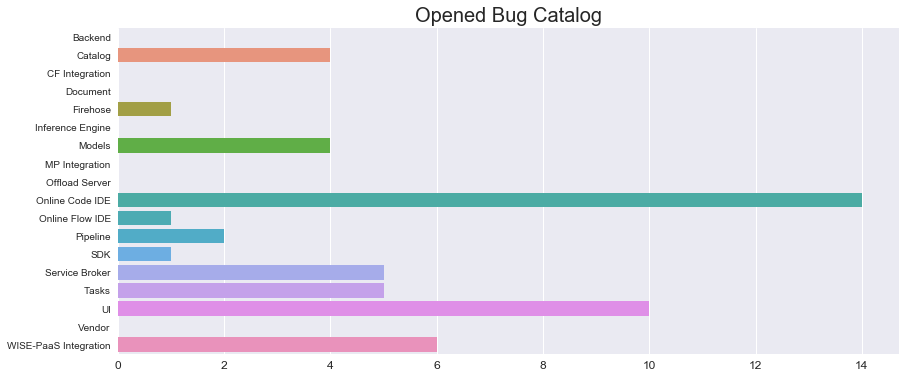

In [49]:
# Plot 'Opened Bug Catalog'
data2 = pd.read_excel('bug_trend.xlsx', sheet_name='sheet2', index_col=0)
ax = sns.barplot(x='1.2.13', y=data2.index, data=data2)
plt.title('Opened Bug Catalog',size=20)
plt.xticks(size=12)
plt.yticks(size=10)
plt.xlabel('')
plt.ylabel('')
fig = plt.gcf()
fig.set_size_inches(14, 6)
fig.savefig('opened_bug_catalog.png', dpi=500)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# sns.color_palette("husl")
data_iii = pd.read_csv('bug_count_iii.csv', index_col=0)
# data_iii
data_adv = pd.read_csv('bug_count_adv.csv', index_col=0)

date = "Oct16"
data_iii[date] = data_iii[date]+ data_adv[date]

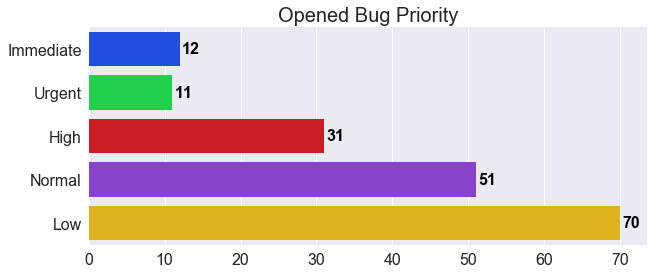

In [2]:
plot_col = data_iii.columns.tolist()[len(data_iii.columns)-1] #拿最後一個column繪圖
ax = sns.barplot(x=plot_col, y=data_iii.index, data=data_iii, palette='bright')
plt.title('Opened Bug Priority',size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('')
plt.ylabel('')

for i, v in enumerate(data_iii[plot_col]):
    ax.text(v+.3, i+.1, str(v), color='black', fontweight='bold', fontsize=16)

fig = plt.gcf()
fig.set_size_inches(10, 4)
fig.savefig('opened_bug_priority.png', dpi=400)


In [6]:
data_iii

,1.2.5,1.2.6,1.2.7,1.2.9,1.2.11,1.2.12,1.2.13,1.2.16,1.2.17,wm0907,day0911,day0918,day0925,day1002,day1004,day1009,Oct11,Oct16
Opened Bug Priority,,,,,,,,,,,,,,,,,,
Immediate,2,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,12
Urgent,8,8,1,1,1,1,0,0,0,0,1,5,10,10,10,12,12,11
High,23,11,14,13,14,15,16,25,26,22,18,19,22,23,23,22,22,31
Normal,35,31,32,33,34,30,25,43,51,56,54,57,55,57,57,51,51,51
Low,11,11,11,11,15,11,12,56,56,61,57,60,61,62,62,68,68,70


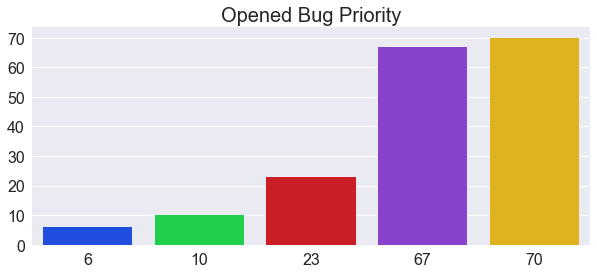

In [19]:
plot_col = data3.columns.tolist()[len(data3.columns)-1] #拿最後一個column繪圖
plot_col2 = data4.columns.tolist()[len(data4.columns)-1] #拿最後一個column繪圖
data_allbug = pd.Series(data3[plot_col]+data4[plot_col2])
data_allbug.index = data4.index
ax = sns.barplot(x=data_allbug, y=data_allbug.index, data=data_allbug, palette='bright')

plt.title('Opened Bug Priority',size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('')
plt.ylabel('')

# for i, v in enumerate(data3[plot_col]):
#     ax.text(v+.3, i+.1, str(v), color='black', fontweight='bold', fontsize=16)

fig = plt.gcf()
fig.set_size_inches(10, 4)
fig.savefig('opened_bug_priority.png', dpi=400)
